\newpage 

library

In [897]:
# Data Handling & Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

# Clustering & Dimensionality Reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples

# Model Training & Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score  # Added recall_scor

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Statsmodels (if needed)
from statsmodels.graphics.mosaicplot import mosaic

# 1. Define and describe a classification problem using the dataset.

In [898]:
df = pd.read_csv("https://raw.githubusercontent.com/PratheepaJ/datasets/refs/heads/master/ass6-dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


Given the UCI heart disease dataset, the classification problem involves predicting the presence or absence of heart disease in patients. The dataset contains 13 features—such as age, sex, chest pain type, blood pressure, cholesterol levels, and others,and a target variable (num) that indicates disease status. My goal is to build predictive models using techniques such as exploratory data analysis, handling missing values, feature selection and engineering, modeling etc.

# 2. Apply any chosen data transformations, or explain why no transformations were necessary

Features variable type transformation: features like sex, cp, fbs, restecg, exang, slope, thal represent categorical information based on UCI, but are stored as integer or flot values. Thus, I will transform varaibable type following information given by UCI:

In [899]:
# transformation
transforming_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
transformations = {col: pd.Categorical(df[col]) for col in transforming_columns}
df = df.assign(**transformations)
df['sex'] = df['sex'].cat.rename_categories({0: 'female', 1: 'male'})
df['cp'] = df['cp'].cat.rename_categories({1: 'typical angina', 2: 'atypical angina', 3: 'non-anginal pain', 4: 'asymptomatic'})
df['fbs'] = df['fbs'].cat.rename_categories({1: 'true', 0: 'false'})
df['restecg'] = df['restecg'].cat.rename_categories({0: 'normal', 1: 'abnormal', 2: 'probable'})
df['exang'] = df['exang'].cat.rename_categories({1: 'yes', 0: 'no'})
df['slope'] = df['slope'].cat.rename_categories({1: 'upsloping', 2: 'flat', 3: 'downsloping'})
df['thal'] = df['thal'].cat.rename_categories({3: 'normal', 6: 'fixed defect', 7: 'reversible defect'})
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,male,typical angina,145,233,true,probable,150,no,2.3,downsloping,0.0,fixed defect,0
1,67,male,asymptomatic,160,286,false,probable,108,yes,1.5,flat,3.0,normal,2
2,67,male,asymptomatic,120,229,false,probable,129,yes,2.6,flat,2.0,reversible defect,1
3,37,male,non-anginal pain,130,250,false,normal,187,no,3.5,downsloping,0.0,normal,0
4,41,female,atypical angina,130,204,false,probable,172,no,1.4,upsloping,0.0,normal,0


In [900]:
#checking the transformations, can delete before submission
print(df['sex'].cat.categories)  
print(df['cp'].cat.categories) 
print(df['fbs'].cat.categories)
print(df['restecg'].cat.categories)
print(df['exang'].cat.categories)
print(df['slope'].cat.categories)
print(df['thal'].cat.categories)
df.dtypes

Index(['female', 'male'], dtype='object')
Index(['typical angina', 'atypical angina', 'non-anginal pain',
       'asymptomatic'],
      dtype='object')
Index(['false', 'true'], dtype='object')
Index(['normal', 'abnormal', 'probable'], dtype='object')
Index(['no', 'yes'], dtype='object')
Index(['upsloping', 'flat', 'downsloping'], dtype='object')
Index(['normal', 'fixed defect', 'reversible defect'], dtype='object')


age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca           float64
thal        category
num            int64
dtype: object

# 3. Provide a detailed description of the dataset, including variables, summaries, number of observations, data types, and distributions (include at least three statements).

In [901]:
#1: missing values and the shape of the dataframe:
for column in df.columns:
    print(f'{column}: {df[column].isnull().sum()} missing values')
df.shape

age: 0 missing values
sex: 0 missing values
cp: 0 missing values
trestbps: 0 missing values
chol: 0 missing values
fbs: 0 missing values
restecg: 0 missing values
thalach: 0 missing values
exang: 0 missing values
oldpeak: 0 missing values
slope: 0 missing values
ca: 4 missing values
thal: 2 missing values
num: 0 missing values


(303, 14)

#### statement 1: The dataset contains 303 observations(rows), 14 variables(columns) in total: with 13 features and 1 target. In features variables, "ca" has 4 missing values, "thal" has 2 missing values.  

In [902]:
#2: data types
print(df.dtypes)

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca           float64
thal        category
num            int64
dtype: object


#### statement 2: In 13 features variables, 7 are category, and 6 are numery; The target variable "num" is shown as numery, while it can be seen as having categorical meaning.  

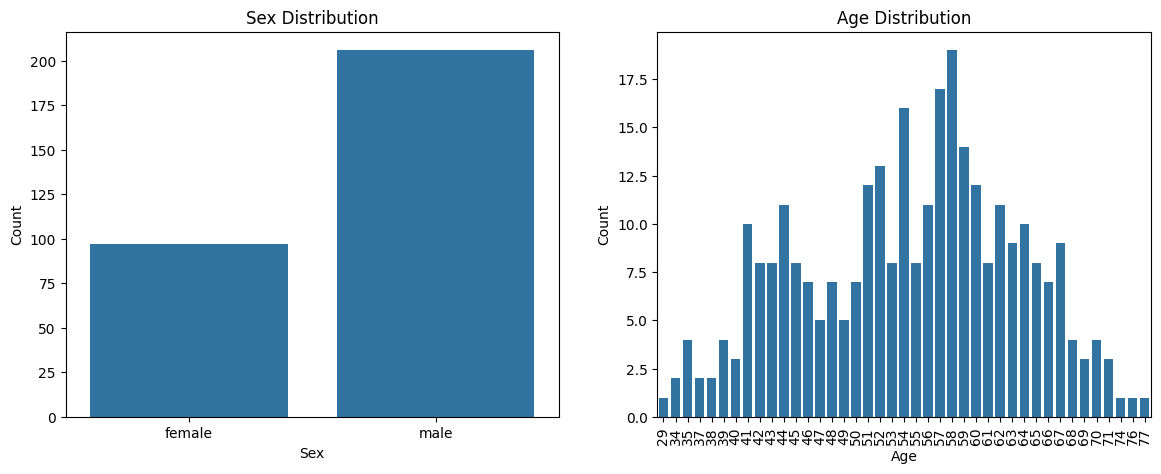

In [903]:
#3: sex and age distribution:
fig, axes = plt.subplots(1, 2,figsize=(14, 5))
sns.countplot(data=df, x='sex', ax=axes[0])
axes[0].set_xlabel("Sex")
axes[0].set_ylabel("Count")
axes[0].set_title("Sex Distribution")

# Second plot: age distribution
sns.countplot(data=df, x='age', ax=axes[1])
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Count")
axes[1].set_title("Age Distribution")
axes[1].tick_params(axis='x', rotation=90)

#### statements 3: The number of male observations is around double the number of female observations. The age distribution shows majority of observatinos are between age 40 to 70.

# 4. Transform the response num into a binary outcome: 1 for heart disease and 0 for no heart disease. So combine 1, 2, 3, and 4 into 1 and 0 for 0. For Questions 4-16, use the transformed binary outcome.

In [904]:
# make binary outcome that indicates if the patient has heart disease or not by 1 or 0
df['num'] = df['num'].apply(lambda x: 1 if x > 0  else 0)

now dataset "df" has a binary target variable "num" that indicates if the patient has heart disease (1) or not (0)

# 5. Analyze relationships between variables and discuss their implications for feature selection or extraction (include at least two statements).

#### numeric variables analysis 

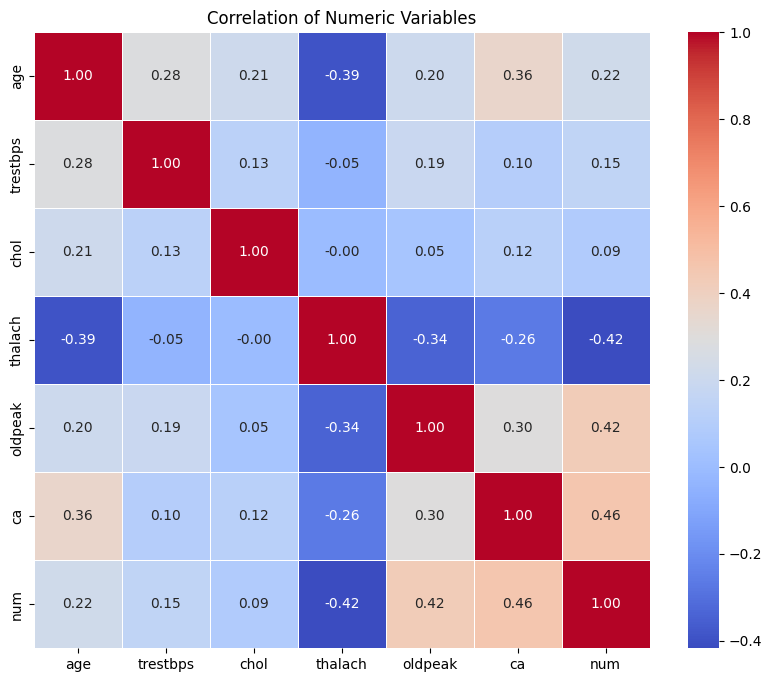

In [905]:
# correlation matrix analysis for numeric variables
numerical_vars = df.select_dtypes(include=[np.number])
scaler = StandardScaler()
numerical_vars_scaled = pd.DataFrame(
    scaler.fit_transform(numerical_vars),
    columns=numerical_vars.columns
)
corr_matrix = numerical_vars_scaled.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

plt.title('Correlation of Numeric Variables')
plt.show()

After analyzing the correlation matrix for numeric variables, there shows some implications:  
- Heart disease (num = 1) is more common among those with lower maximum heart rate (thalach), higher ST depression (oldpeak), and a greater number of major vessels colored by fluoroscopy (ca).  
- Considering dropping age,trestbps,chol features in later modeling, since their correlation are relatively low with "num".
- even though "ca" has 4 outcome value, which looks like it might fit into categorical variable, but considering its high correlation with "num", I will keep it as numeric variable so it can be used for numerical analysis.

#### categorical variables vs. target variable analysis:

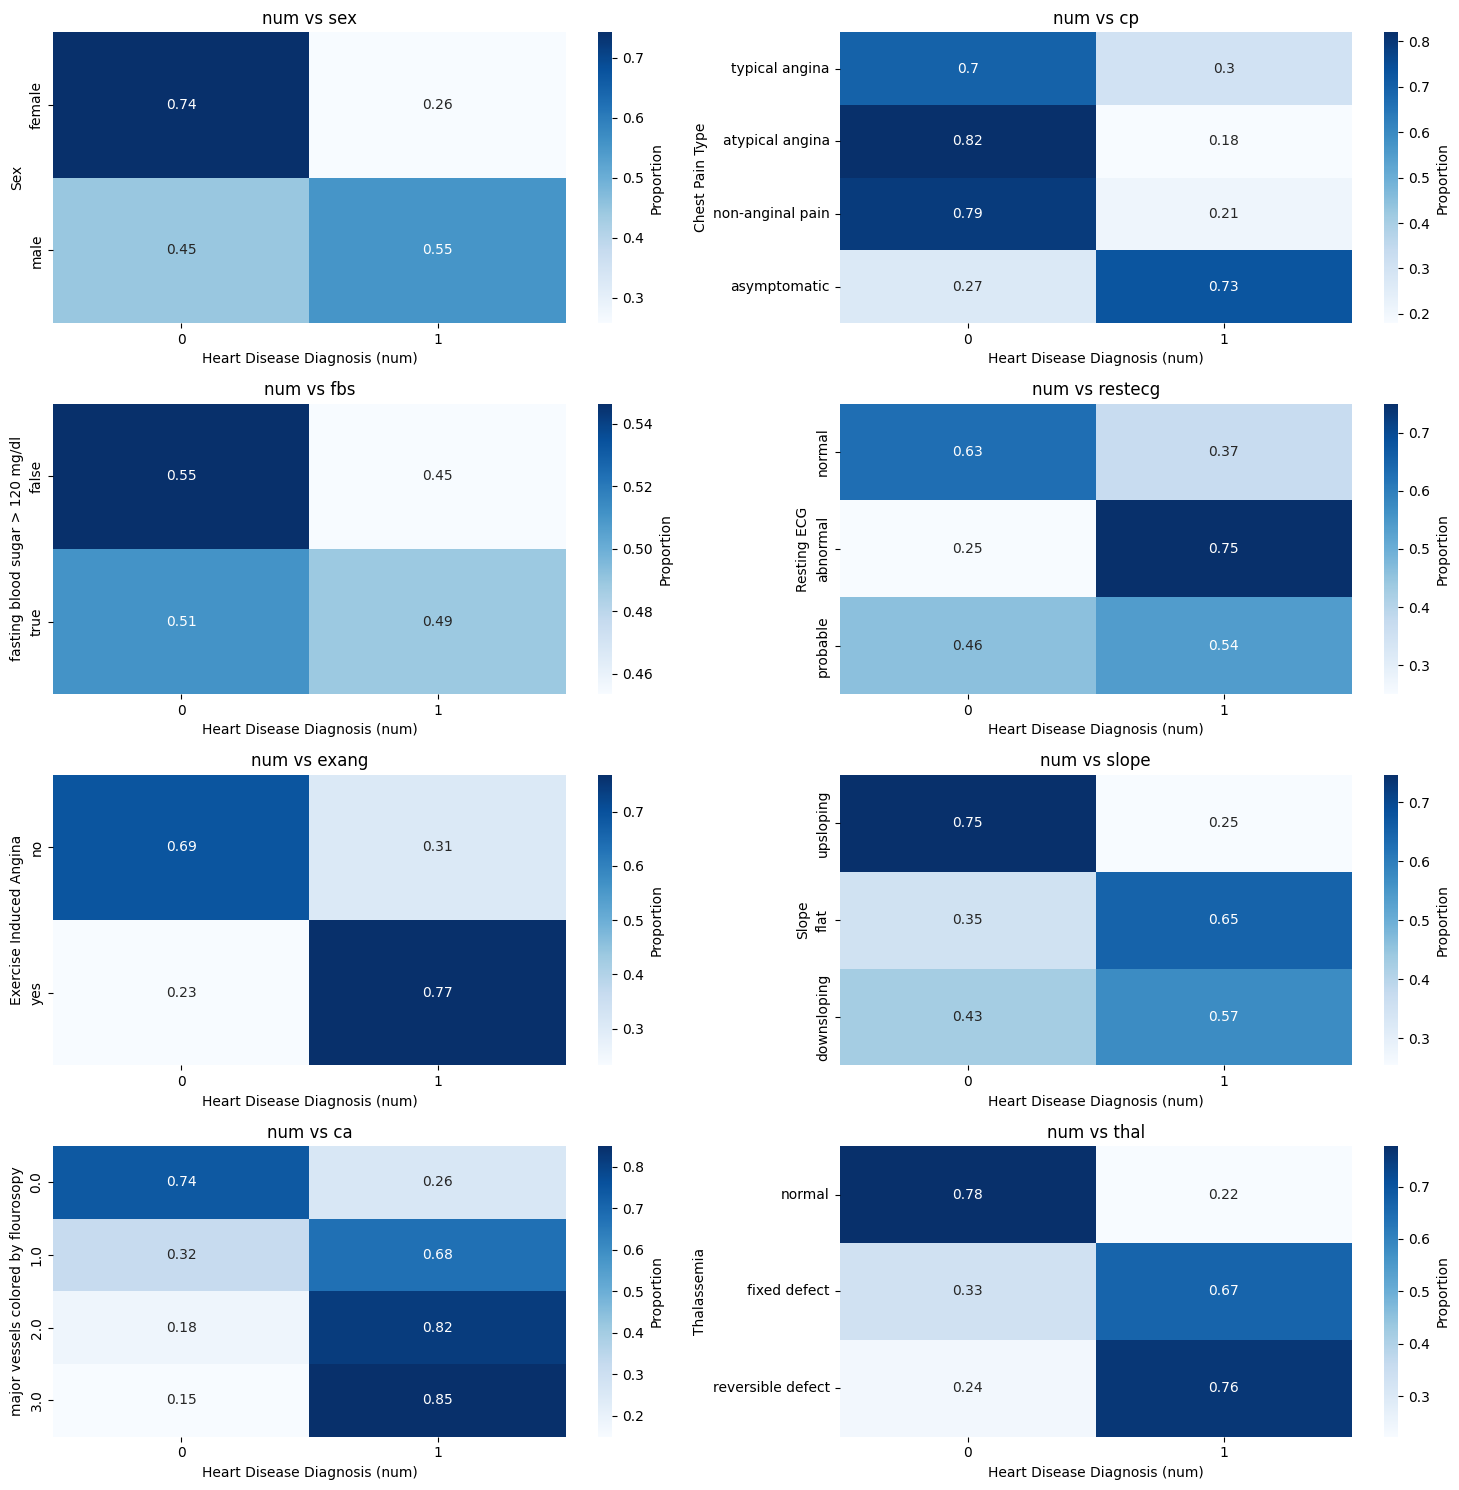

In [906]:
plot_details = [
    ("sex", "num vs sex", "Heart Disease Diagnosis (num)", "Sex"),
    ("cp", "num vs cp", "Heart Disease Diagnosis (num)", "Chest Pain Type"),
    ("fbs", "num vs fbs", "Heart Disease Diagnosis (num)", "fasting blood sugar > 120 mg/dl"),
    ("restecg", "num vs restecg", "Heart Disease Diagnosis (num)", "Resting ECG"),
    ("exang", "num vs exang", "Heart Disease Diagnosis (num)", "Exercise Induced Angina"),
    ("slope", "num vs slope", "Heart Disease Diagnosis (num)", "Slope"),
    ("ca", "num vs ca", "Heart Disease Diagnosis (num)", "major vessels colored by flourosopy"),
    ("thal", "num vs thal", "Heart Disease Diagnosis (num)", "Thalassemia")
    
]

# Create a figure with a grid. 3 rows and 2 columns will give us 6 slots (we have 5 plots)
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
axes = axes.flatten()  # Make it a 1D array for easier indexing

# Loop through each item in the list, create the heatmap and set labels
for i, (col, title, xlabel, ylabel) in enumerate(plot_details):
    contingency_table = pd.crosstab(df[col], df['num'], normalize='index')
    sns.heatmap(contingency_table, annot=True, cmap='Blues', cbar_kws={'label': 'Proportion'}, ax=axes[i])
    axes[i].set_title(title)
    axes[i].set_xlabel(xlabel)
    axes[i].set_ylabel(ylabel)

plt.tight_layout()
plt.show()


After analyzing the relationship between categorical variables and target "num", from the heatmaps there shows some implications:  
- Considering proprotion bigger than 0.7, heart disease appearance(1) more common among: Asymptomatic Chest Pain Type; abnormal resting ecg; exercise induced angina; major vessels colored by floursopy numer is 2 or 3; thalassemia reversible deficit.
- considering features selction which shows stronger implications towards heart disease, like cp, restecg, exang, ca, thal.

# 6. Drop the rows with the missing values. How many observations after dropping the missing values. Skip the outlier analysis.

In [907]:
df = df.dropna()
df.shape

(297, 14)

After dropping missing values, there are 297 observations left.

# 7. Sub-group analysis: Explore potential sub-groups within the data using appropriate data science methods. Identify and visualize these sub-groups without using the labels and categorical variables. Categroical variables already define sub groups so we don’t need to include them for this analysis.

In [908]:
# ---- Step 1: Select Numeric Features for Clustering ----
numeric_features = ['thalach', 'oldpeak', 'ca']
clust_df = df[numeric_features].copy()
# ---- Step 2: Standardize the Data ----
# (Using StandardScaler because of the presence of outliers)
scaler = StandardScaler()
clust_df_scaled = scaler.fit_transform(clust_df)
clust_df_scaled = pd.DataFrame(clust_df_scaled, columns=numeric_features)
print(clust_df_scaled.head())


    thalach   oldpeak        ca
0  0.017494  1.068965 -0.721976
1 -1.816334  0.381773  2.478425
2 -0.899420  1.326662  1.411625
3  1.633010  2.099753 -0.721976
4  0.978071  0.295874 -0.721976


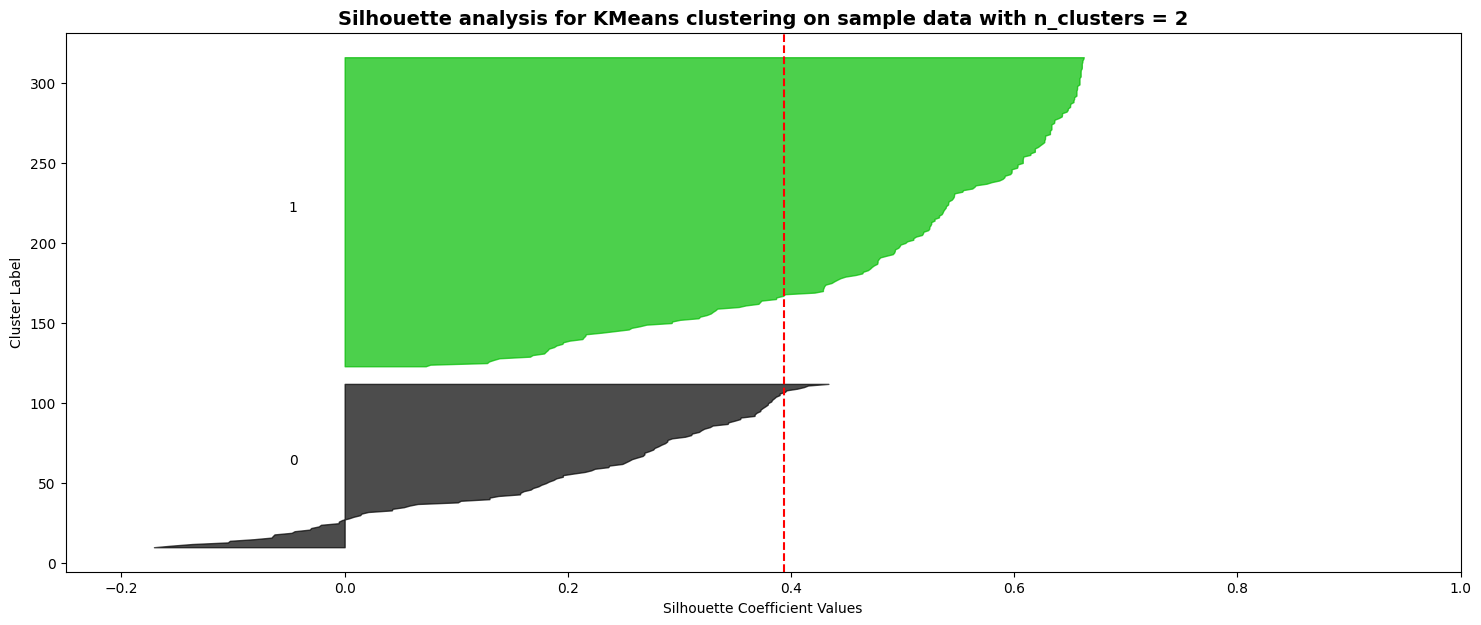

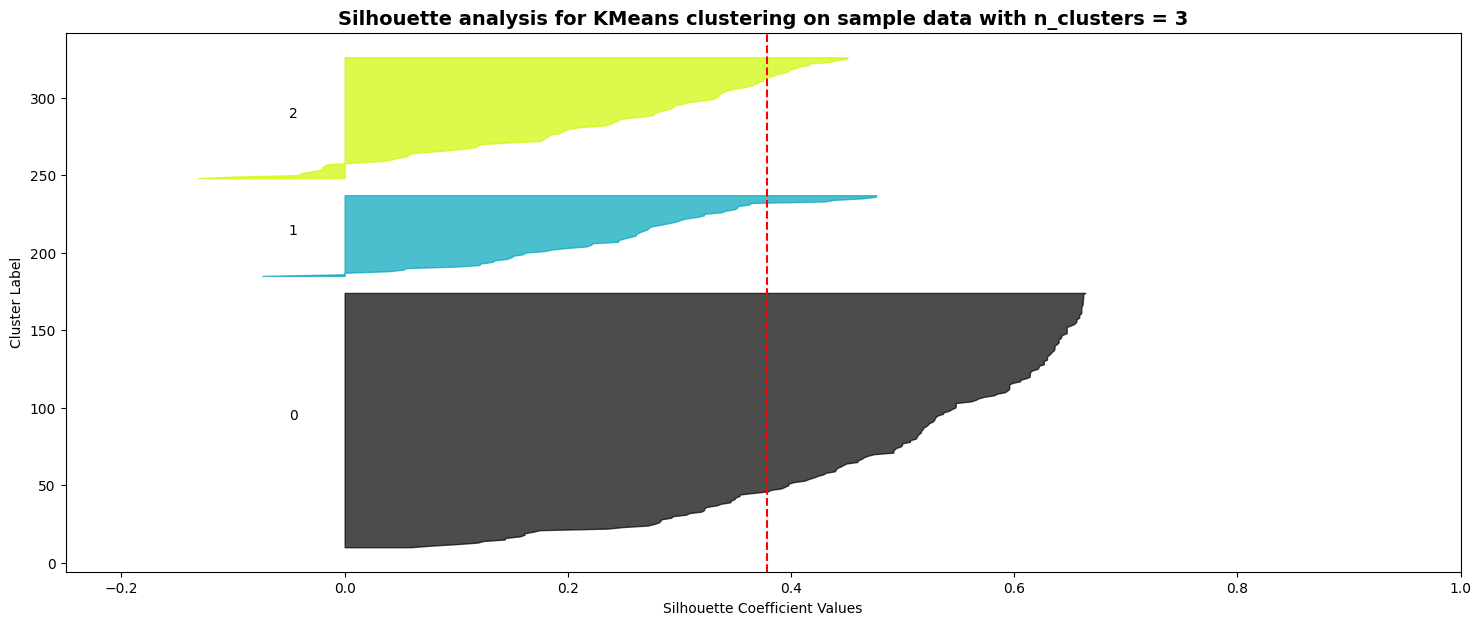

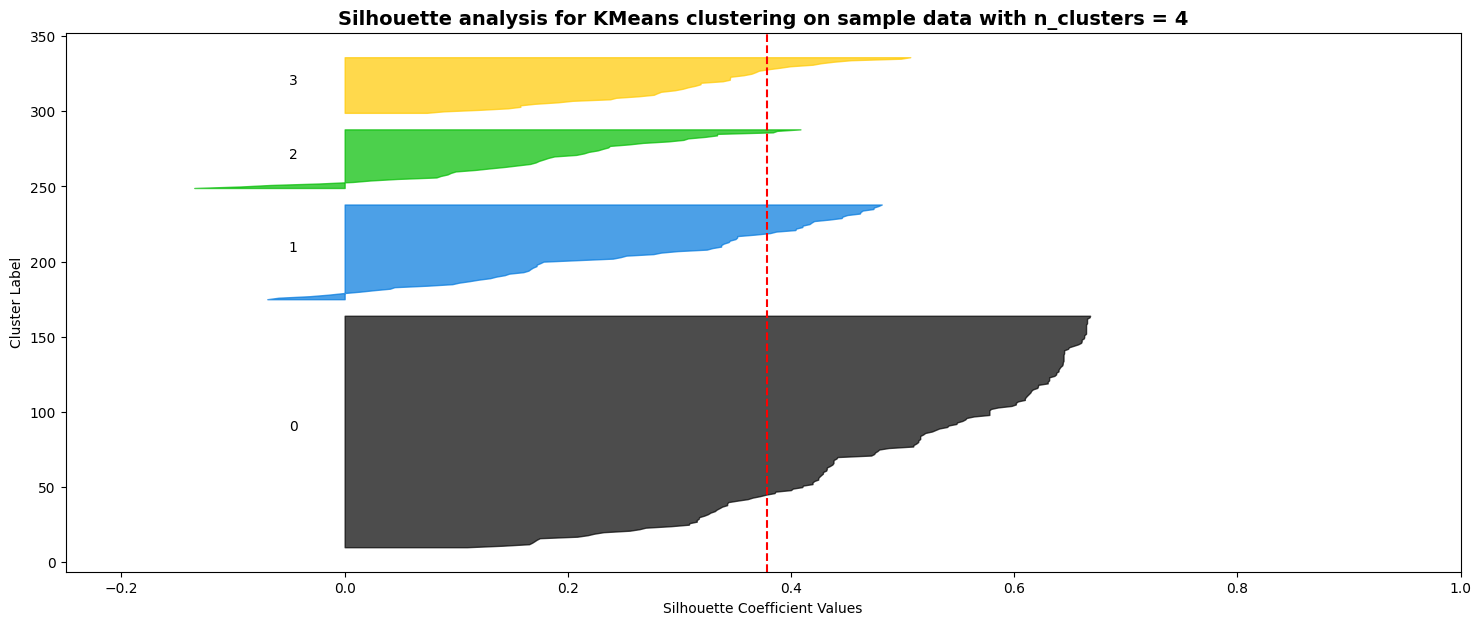

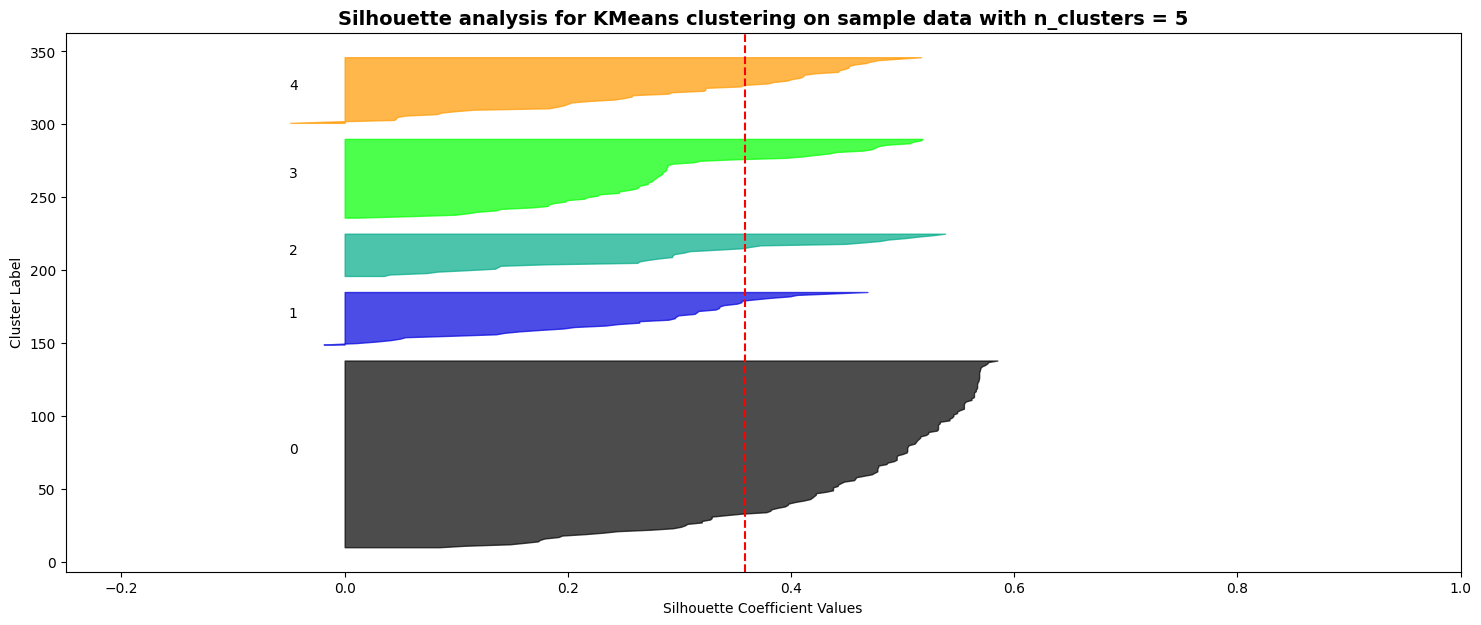

In [909]:
# Loop through different numbers of clusters
range_n_clusters = range(2, 6)
for n_clusters in range_n_clusters:
    # Fit KMeans clustering with n_clusters
    km = KMeans(n_clusters=n_clusters, n_init=20, random_state=0)
    cluster_labels_km = km.fit_predict(clust_df_scaled)
    
    # Calculate the average silhouette score and per-sample silhouette scores
    silhouette_avg_km = silhouette_score(clust_df_scaled, cluster_labels_km)
    sample_silhouette_values = silhouette_samples(clust_df_scaled, cluster_labels_km)
    
    # Set up the figure
    fig, ax1 = plt.subplots(1, 1, figsize=(18, 7))
    ax1.set_xlim([-0.25, 1])
    y_lower = 10
    
    # Loop over each cluster to plot its silhouette scores
    for i in range(n_clusters):
        # Get the silhouette scores for cluster i and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_km == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Choose a color for the cluster and fill the area for its scores
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0,
                          ith_cluster_silhouette_values,
                          facecolor=color,
                          edgecolor=color,
                          alpha=0.7)
        
        # Label the silhouette plot with the cluster number
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Update the starting point for the next cluster plot
        y_lower = y_upper + 10  # Add 10 for a gap between clusters
        
    # Set plot title and axis labels
    ax1.set_title("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters,
                  fontsize=14,
                  fontweight="bold")
    ax1.set_xlabel("Silhouette Coefficient Values")
    ax1.set_ylabel("Cluster Label")
    
    # Draw a vertical line for the average silhouette score
    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    
    # Display the plot for the current number of clusters
    plt.show()

In [910]:
range_n_clusters = range(2, 6)
best_score = -1
best_n_clusters = None

for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, n_init=20, random_state=0)
    cluster_labels = km.fit_predict(clust_df_scaled)
    silhouette_avg = silhouette_score(clust_df_scaled, cluster_labels)
    print(f"For n_clusters = {n_clusters}, average silhouette score = {silhouette_avg:.3f}")
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_n_clusters = n_clusters

print(f"Optimal number of clusters: {best_n_clusters}")

For n_clusters = 2, average silhouette score = 0.394
For n_clusters = 3, average silhouette score = 0.378
For n_clusters = 4, average silhouette score = 0.379
For n_clusters = 5, average silhouette score = 0.359
Optimal number of clusters: 2


In [911]:
final_km = KMeans(n_clusters=2, n_init=20, random_state=0)
final_cluster_labels = final_km.fit_predict(clust_df_scaled)

# Assign cluster labels back to the original DataFrame
df['cluster'] = final_cluster_labels
df['cluster'] = df['cluster'].astype('category')

pd.crosstab(df['cluster'], df['num'], rownames=['Cluster'], colnames=['Heart Disease'])  

Heart Disease,0,1
Cluster,,
0,19,84
1,141,53


#### visualize sub-groups

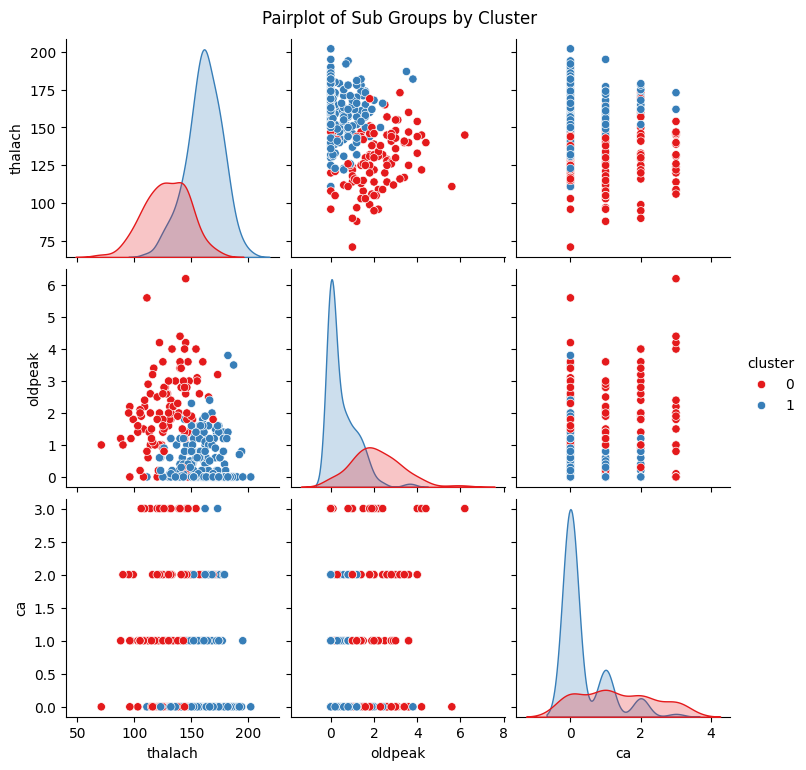

In [912]:
sns.pairplot(df, vars=['thalach', 'oldpeak', 'ca'], hue='cluster', palette='Set1')
plt.suptitle("Pairplot of Sub Groups by Cluster", y=1.02)
plt.show()



# 8. Split 30% of the data for testing using a random seed of 1. Use the remaining 70% for training and model selection

In [913]:

X = df.drop(columns='num')  # all features except the target
y = df['num']               # the target

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,random_state=1, stratify=y)


# 9. Identify the two classifiers you have chosen. Justify your selections based on the classifier requirement for this assignment.

The 2 classifiers I have chosen are: logistic regression and KNN
- justification: logistic regression is interpretable, and its coefficients tells how each feature affect probability of outcome; This makes it helpful when tyring to understand the relationship between features and the target variable.
- K-Nearest Neighbors was selected due to its simplicity and non-parametric nature. It classifies new observations based on similarity to the training data, which allows it to capture non-linear patterns in the data that a linear model might miss.

# 10. Specify two metrics to compare classifier performance. Provide technical details on how each metric is computed.

The following metrics will be used: Accuracy and sensitivity, the will be computed using confusion matrix's information of TN,FP,FN,TP:  
- Accuracy measures the proportion of correctly predicted observations (both positive and negative) among the total observations; Sensitivity measures the proportion of actual positive cases that were correctly identified by the classifier.
- Using result of Confusion Matrix(cm), they will be compute as:     
"accuracy = (cm[0,0]+cm[1,1]) / total"  
"sensitivity = cm[1,1] / (cm[1,0]+cm[1,1])"

# 11. Train two selected classifiers in (9) and identify optimal tuning parameters (if applicable) using the training set.

#### for logistic regression and KNN:

In [914]:
# 1. Split the data
X = df.drop(columns='num')
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)
# 2. Build preprocessing pipeline for ALL features
numeric_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object','category']).columns.tolist()

preprocessor_all = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

X_train_all = preprocessor_all.fit_transform(X_train)
X_test_all  = preprocessor_all.transform(X_test)

# 3a. Train Logistic Regression
logreg_all = LogisticRegression(max_iter=1000, solver='liblinear', random_state=1)
logreg_all.fit(X_train_all, y_train)

# 3b. Tune and train KNN:5-fold cross validation used 
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, {'n_neighbors': list(range(1,21))}, cv=5, scoring='accuracy')
grid_knn.fit(X_train_all, y_train)
knn_best = grid_knn.best_estimator_

# 12. Apply a feature selection or extraction method to one of the classifiers in (9). Train this third classifier.

#### based on earlier association analysis (code at question 5), I will choose to drop variables: age and created a 3rd classifier using logistic regression:

In [915]:
# 1. Define the reduced feature set (drop 'age')
drop_cols = ['age']
X_train_red = X_train.drop(columns=drop_cols)
X_test_red  = X_test.drop(columns=drop_cols)

# 2. Preprocessing pipeline for reduced set
numeric_red = [c for c in numeric_cols if c not in drop_cols]
preprocessor_red = ColumnTransformer([
    ('num', StandardScaler(), numeric_red),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

X_train_rd = preprocessor_red.fit_transform(X_train_red)
X_test_rd  = preprocessor_red.transform(X_test_red)

# 3. Train Logistic Regression on reduced features
logreg_drop = LogisticRegression(max_iter=1000, solver='liblinear', random_state=1)
logreg_drop.fit(X_train_rd, y_train)

LogisticRegression(max_iter=1000, random_state=1, solver='liblinear')

# 13. Use the selected metrics to evaluate three classifiers in (11) and (12) on the test set.

In [916]:
# evaluation results for 3 classifiers:
# Helper to compute metrics
def get_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    total = cm.sum()
    accuracy    = (cm[0,0] + cm[1,1]) / total
    sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
    return cm, accuracy, sensitivity

# 1. Predictions
y_pred_lr_all  = logreg_all.predict(X_test_all)
y_pred_knn     = knn_best.predict(X_test_all)
y_pred_lr_drop = logreg_drop.predict(X_test_rd)

# 2. Metrics
cm_lr_all,  acc_lr_all,  sens_lr_all  = get_metrics(y_test, y_pred_lr_all)
cm_knn,     acc_knn,     sens_knn     = get_metrics(y_test, y_pred_knn)
cm_lr_drop, acc_lr_drop, sens_lr_drop = get_metrics(y_test, y_pred_lr_drop)

# 3. Summary table
results = pd.DataFrame({
    'Model': [
        'Logistic (all features)',
        f'KNN (k={knn_best.n_neighbors})',
        'Logistic (drop age)'
    ],
    'Accuracy':    [acc_lr_all, acc_knn, acc_lr_drop],
    'Sensitivity': [sens_lr_all, sens_knn, sens_lr_drop]
})

print(results)


                     Model  Accuracy  Sensitivity
0  Logistic (all features)  0.866667     0.809524
1               KNN (k=16)  0.866667     0.761905
2      Logistic (drop age)  0.877778     0.809524


### finding discussion:  
- using metrices accuracy and sensitivity, all 3 models give solid result, with 3rd logistic regression (with dropped) features gives the highest accuracy and sensitivity:0.0.877778  and 0.809524
- in comparison, KNN gives the lowest sensitivity, showing that KNN might be less effective at prediting true heart disease outcome(1).
- the feature selection dropped age and slightly improved accuracy without decreaseing sensitivity, this shows that age may be irrelevant during heart disease prediction here, and provs that feature selection is important and can improve model performance.

# 14. For the best interpretable model identified in (13), analyze and interpret the most important predictor variables in the context of the classification challenge (at least two statements).

In [917]:
coef_df = pd.DataFrame({
    'Feature': feature_names_red, 
    'Coefficient': coefs,
    'Abs_Coefficient': np.abs(coefs)
}).sort_values(by='Abs_Coefficient', ascending=False)

# 5. Display top features
print("Top features in Logistic Regression (drop age):")
print(coef_df.head(10))

Top features in Logistic Regression (drop age):
                   Feature  Coefficient  Abs_Coefficient
5                 sex_male     1.297303         1.297303
7      cp_non-anginal pain    -1.227933         1.227933
16  thal_reversible defect     1.075347         1.075347
8        cp_typical angina    -1.048803         1.048803
12               exang_yes     0.801195         0.801195
4                       ca     0.800551         0.800551
9                 fbs_true    -0.730290         0.730290
6       cp_atypical angina    -0.612203         0.612203
15             thal_normal    -0.487569         0.487569
14         slope_upsloping    -0.470280         0.470280


#### my observations: 
- The most important predictor variables in the logistic regression model are: sex_male(+1.297303), thal_reversible defect (+1.08) thal, and ca(+0.8) which implies that observation who is male and have a reversible thalassemia defect have higher heart disease risk.  
- 3 of 4 "cp" features are at top features, and shows negative coefficients, implies Patients reporting non-anginal, typical, or atypical chest pain have lower risk compared to asymptomatic patients.
- a potential high risk observation group might be: Males, asymptomatic patients, and those with reversible thalassemia defects or visible arterial blockages 